## Preprocessing

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

terget = []
images = []
flat_data = []
DATADIR = 'dataset/practice/train'
CATEGORIES = ['freshapples', 'freshbanana', 'freshoranges']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
#     print(img_array)
    # plt.imshow(img_array)
    img_resized = resize(img_array, (150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    terget.append(class_num)
    
flat_data = np.array(flat_data)
terget = np.array(terget)
images = np.array(images)

<BarContainer object of 3 artists>

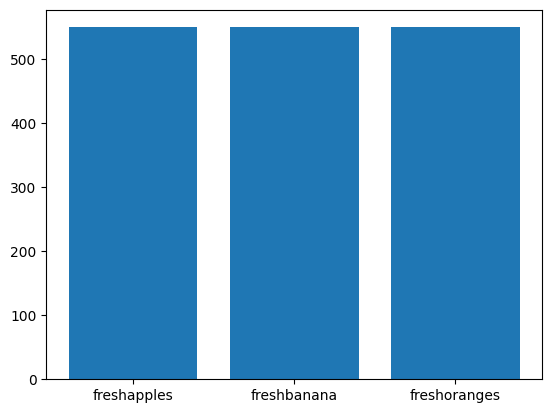

In [2]:
unique, count = np.unique(terget, return_counts = True)
plt.bar(CATEGORIES,count)

## Split data into taining and testing

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data, terget, test_size=0.3,random_state=109)

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [ 
    {'C':[1,10,100,1000], 'kernel': ['linear']},
    {'C':[1,10,100,1000], 'gamma':[0.001,0.0001], 'kernel': ['rbf']}
]

svc = svm.SVC(probability=True)
elf = GridSearchCV(svc,param_grid)
elf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [5]:
y_pred = elf.predict(x_test)
y_pred

array([2, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2,
       1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 2, 1,
       1, 1, 2, 1, 0, 0, 1, 0, 2, 0, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0,
       0, 1, 2, 0, 1, 1, 1, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 2, 2, 0, 1, 1,
       2, 1, 1, 0, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0,
       1, 1, 2, 2, 1, 0, 0, 2, 1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 2, 0, 2, 1, 1, 2,
       0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 0, 1, 1, 2, 1, 1, 1, 0, 0, 2, 2,
       1, 2, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 1, 0,
       0, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 0, 2, 2, 1, 2, 0, 1, 0, 1, 0, 1,
       0, 2, 1, 1, 1, 2, 0, 2, 0, 1, 0, 1, 1, 2, 1, 0, 2, 0, 0, 2, 2, 1,
       2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 2, 1, 0,
       1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 2, 1, 0, 1, 0, 2, 1, 2, 0,
       0, 0, 1, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0,

In [6]:
y_test

array([2, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 2, 2,
       1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 2, 1,
       1, 1, 2, 1, 0, 0, 1, 0, 2, 0, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0,
       0, 1, 2, 0, 1, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 2, 2, 0, 1, 1,
       2, 1, 1, 0, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0,
       1, 1, 2, 2, 1, 0, 0, 2, 1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0,
       2, 1, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 2, 0, 2, 1, 1, 2,
       2, 2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 2, 2,
       1, 2, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 1, 0,
       0, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 0, 2, 2, 1, 2, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 2, 0, 2, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1,
       2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 2, 1, 0,
       1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 2, 1, 0, 1, 0, 2, 1, 2, 0,
       0, 0, 1, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0,

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_pred,y_test)

0.9717171717171718

In [8]:
confusion_matrix(y_pred,y_test)

array([[154,   5,   1],
       [  1, 174,   4],
       [  2,   1, 153]], dtype=int64)

In [9]:
# Save the model using pickle libarary
import pickle
pickle.dump(elf,open('img_model.p', 'wb'))

In [10]:
model = pickle.load(open('img_model.p', 'rb'))

Enter URLhttps://upload.wikimedia.org/wikipedia/commons/9/9b/Cavendish_Banana_DS.jpg
(2664, 3997, 3)
 Predicted Output: freshbanana
freshapples : 15.511474803656458%
freshbanana : 82.75111441789265%
freshoranges : 1.7374107784509165%


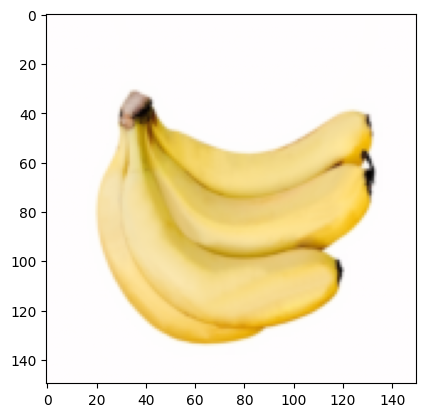

In [12]:
# Testing a new image
flat_data = []
url = input('Enter URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' Predicted Output: {y_out}')
q = model.predict_proba(flat_data)
for index, item in enumerate(CATEGORIES):
    print(f'{item} : {q[0][index]*100}%')

In [13]:
%%writefile app.py
# Deployment(WebApp)
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.title('Image Classifier')
st.text('Upload the Image')

model = pickle.load(open('img_model.p', 'rb'))
uploaded_file = st.file.uploader("choose an image...", type='jpg')
if uploaded_file is not None :
    img = Image.open(uploaded_file)
    st.image(img, caption = 'Uploaded Iamge')
    if st.button('PREDICT'):
        CATEGORIES = ['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']
        st.write('Result...')
        flat_data = []
        img = np.array(img)
        img_resized = resize(img,(150,150,3))
        flat_data.append(img_resized.flatten())
        flat_data = np.array(flat_data)
        y_out = model.predict(flat_data)
        y_out = CATEGORIES[y_out[0]]
        st.title(f' Predicted Output: {y_out}')
        q = model.predict_proba(flat_data)
        for index, item in enumerate(CATEGORIES):
            st.write(f'{item} : {q[0][index]*100}%')

Overwriting app.py


In [14]:
from pyngrok import ngrok
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
url

OSError: Background processes not supported.